In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irfanfadhullah","key":"1ff88748b498312e668d02a61cf44260"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:00<00:00, 76.5MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('creditcardfraud.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

## Detection using CNN

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('/content/files/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.shape

(284807, 31)

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df['Class'].value_counts() #Check the target or label

0    284315
1       492
Name: Class, dtype: int64

### Balancing The Label Dataset

In [19]:
legitimate = df[df['Class']==0]
fraud = df[df['Class']==1]

In [20]:
legitimate.shape, fraud.shape

((284315, 31), (492, 31))

In [21]:
legitimate = legitimate.sample(fraud.shape[0])
legitimate.shape

(492, 31)

In [22]:
df = fraud.append(legitimate,ignore_index=True)

In [23]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,46918.0,1.422248,-0.461950,0.250672,-0.987080,-0.580954,-0.197695,-0.624681,-0.029190,-1.069225,0.755139,0.853108,0.240728,0.945396,-0.158694,0.070103,1.640072,-0.377259,-0.893666,1.228405,0.154151,-0.093681,-0.387395,0.005797,-0.529356,0.340976,-0.446398,0.010016,0.005478,10.00,0
980,57242.0,-0.640578,-0.835632,1.669403,-2.647983,-0.618644,0.107048,-0.431194,0.141973,-2.115012,0.585949,-1.337557,-1.513215,0.380785,-0.612452,0.480577,0.019989,0.070398,0.271321,-1.148890,-0.155404,0.045223,0.296509,-0.085318,-0.803619,0.140941,-0.180724,0.085658,0.098313,78.00,0
981,121725.0,1.139107,-3.077281,-3.039725,-1.077517,-1.125187,-1.446970,0.726425,-0.676454,-2.216854,1.671893,0.588371,-1.037686,-1.335060,0.936049,-1.155822,-1.126250,0.701157,0.357153,0.050889,0.712458,0.538141,0.572093,-0.685423,0.128440,0.328634,0.214339,-0.202199,0.009094,642.80,0
982,113839.0,0.184878,1.766164,-0.070423,4.289554,0.783693,0.694960,0.493720,0.284776,-2.467703,1.364078,-1.817331,-0.339320,1.745071,0.444862,0.859860,0.248660,-0.242275,0.453834,1.244533,0.186826,0.266097,0.721893,-0.255210,-0.955845,0.231578,0.643818,-0.134332,-0.127543,31.86,0


In [25]:
df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [27]:
X = df.drop('Class',axis=1)
y = df['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify =y)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
y_train= y_train.to_numpy()
y_test = y_test.to_numpy()

In [34]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN Architecture

In [46]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv1D(32, 2, activation = 'relu', input_shape=X_train[0].shape),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv1D(64, 2, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [47]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
epochs =100
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), verbose=2, epochs = epochs)

Epoch 1/100
25/25 - 0s - loss: 0.6953 - accuracy: 0.7039 - val_loss: 0.6280 - val_accuracy: 0.8426
Epoch 2/100
25/25 - 0s - loss: 0.5134 - accuracy: 0.7929 - val_loss: 0.5836 - val_accuracy: 0.8934
Epoch 3/100
25/25 - 0s - loss: 0.4098 - accuracy: 0.8450 - val_loss: 0.5444 - val_accuracy: 0.9036
Epoch 4/100
25/25 - 0s - loss: 0.3580 - accuracy: 0.8640 - val_loss: 0.5134 - val_accuracy: 0.9086
Epoch 5/100
25/25 - 0s - loss: 0.3003 - accuracy: 0.8895 - val_loss: 0.4795 - val_accuracy: 0.9137
Epoch 6/100
25/25 - 0s - loss: 0.3331 - accuracy: 0.8729 - val_loss: 0.4498 - val_accuracy: 0.9188
Epoch 7/100
25/25 - 0s - loss: 0.2905 - accuracy: 0.8983 - val_loss: 0.4192 - val_accuracy: 0.9188
Epoch 8/100
25/25 - 0s - loss: 0.2856 - accuracy: 0.9009 - val_loss: 0.3908 - val_accuracy: 0.9137
Epoch 9/100
25/25 - 0s - loss: 0.2251 - accuracy: 0.9187 - val_loss: 0.3660 - val_accuracy: 0.9137
Epoch 10/100
25/25 - 0s - loss: 0.2593 - accuracy: 0.9022 - val_loss: 0.3303 - val_accuracy: 0.9239
Epoch 11/

In [49]:
def plot_learning(history, epochs):
  epochs_range= range(1,epochs+1)
  plt.plot(epochs_range, history.history['accuracy'])
  plt.plot(epochs_range, history.history['val_accuracy'])
  plt.title('Accuracy Model')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epochs_range, history.history['loss'])
  plt.plot(epochs_range, history.history['val_loss'])
  plt.title('Loss Model')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


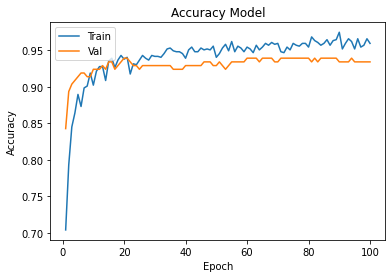

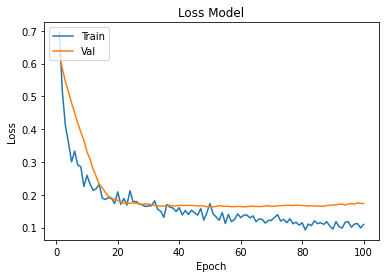

In [50]:
epochs=100
plot_learning(history, epochs)

### Adding the MaxPool1D, and compare

In [52]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv1D(32, 2, activation = 'relu', input_shape=X_train[0].shape),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool1D(2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv1D(64, 2, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool1D(2),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)            

In [53]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
epochs =100
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), verbose=2, epochs = epochs)

Epoch 1/100
25/25 - 0s - loss: 1.5961 - accuracy: 0.4269 - val_loss: 0.6963 - val_accuracy: 0.5431
Epoch 2/100
25/25 - 0s - loss: 1.1976 - accuracy: 0.5260 - val_loss: 0.6535 - val_accuracy: 0.7107
Epoch 3/100
25/25 - 0s - loss: 1.0576 - accuracy: 0.5616 - val_loss: 0.6238 - val_accuracy: 0.6853
Epoch 4/100
25/25 - 0s - loss: 0.7799 - accuracy: 0.6480 - val_loss: 0.6040 - val_accuracy: 0.6701
Epoch 5/100
25/25 - 0s - loss: 0.7082 - accuracy: 0.6912 - val_loss: 0.5885 - val_accuracy: 0.6650
Epoch 6/100
25/25 - 0s - loss: 0.6431 - accuracy: 0.7103 - val_loss: 0.5719 - val_accuracy: 0.6751
Epoch 7/100
25/25 - 0s - loss: 0.5906 - accuracy: 0.7306 - val_loss: 0.5520 - val_accuracy: 0.6904
Epoch 8/100
25/25 - 0s - loss: 0.5299 - accuracy: 0.7649 - val_loss: 0.5295 - val_accuracy: 0.7107
Epoch 9/100
25/25 - 0s - loss: 0.5094 - accuracy: 0.7726 - val_loss: 0.5020 - val_accuracy: 0.7208
Epoch 10/100
25/25 - 0s - loss: 0.5236 - accuracy: 0.7954 - val_loss: 0.4752 - val_accuracy: 0.7360
Epoch 11/

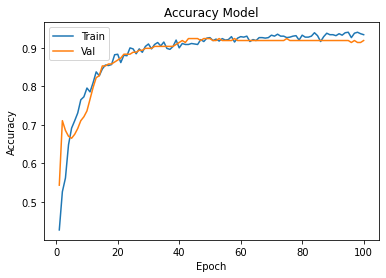

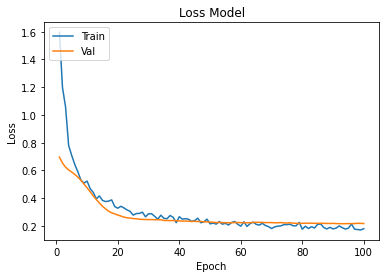

In [55]:
plot_learning(history, epochs)